In [73]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import calendar
import pandas as pd
import numpy as np

# get data from the yahoo finance api
apple = data.DataReader("AAPL", start="2018-1-1", end="2019-12-24", data_source="yahoo")

tesla = data.DataReader("TSLA", start="2018-1-1", end="2019-12-24", data_source="yahoo")

microsoft = data.DataReader("MSFT", start="2018-1-1", end="2019-12-24", data_source="yahoo")

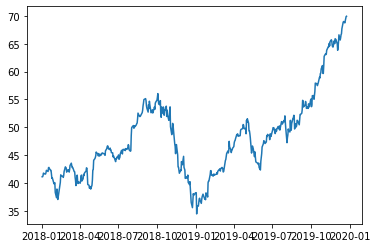

In [3]:
plt.plot(apple.index, apple["Adj Close"])

In [4]:
apple.loc["2019-1-1" : "2019-12-24"]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.277534
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.464798
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,35.936077
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.856091
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.539623
...,...,...,...,...,...,...
2019-12-18,70.474998,69.779999,69.949997,69.934998,116028400.0,68.823685
2019-12-19,70.294998,69.737503,69.875000,70.004997,98369200.0,68.892586
2019-12-20,70.662498,69.639999,70.557503,69.860001,275978000.0,68.749886


In [5]:
#Merge the dataframe with adj. closing price
#compute returns for each day
#Find average profitable days in a month
#find correlation between the stock prices
#Find the dates for the highs and the lows of each stock
#Whats the net return for all stocks

In [6]:
only19 = apple.index.year == 2019
apple[only19]

df = pd.concat([apple["Adj Close"], tesla["Adj Close"], microsoft["Adj Close"]], axis=1)
df.rename({0: "Date", 1: "Apple", 2: "Tesla", 3: "Microsoft"}, axis="columns")

df.columns = ["Apple", "Tesla", "Microsoft"]
df.head()

,Apple,Tesla,Microsoft
Date,,,
2018-01-02,41.135757,64.106003,81.530235
2018-01-03,41.128590,63.450001,81.909660
2018-01-04,41.319626,62.924000,82.630577
2018-01-05,41.790066,63.316002,83.655052
2018-01-08,41.634853,67.281998,83.740417


In [63]:
returns = df/df.shift(1) - 1
returns.iloc[0,:] = 0
returns.columns = ["AAPL_returns", "TSLA_returns", "MSFT_returns"]
returns.head()

,AAPL_returns,TSLA_returns,MSFT_returns
Date,,,
2018-01-02,0.000000,0.000000,0.000000
2018-01-03,-0.000174,-0.010233,0.004654
2018-01-04,0.004645,-0.008290,0.008801
2018-01-05,0.011385,0.006230,0.012398
2018-01-08,-0.003714,0.062638,0.001020


In [96]:
#Find average profitable days in a month

returns.head()
# df.index
# pd.DatetimeIndex(df.index).to_period("M")

monthly_gb = returns.groupby([returns.index.year, returns.index.month])

# sum of all positive returns
# sum_of_positive_returns = monthly_gb.aggregate([("Sum_Positive", lambda x: x[x > 0].sum()), ("Count", lambda x: x[x>0].count())])

# count of all days, where returns are positive
profitable_days = monthly_gb.aggregate([("Profitable Days", lambda x: x[x>0].count())])

profitable_days.loc["Average profitable days in a month"] = profitable_days.mean()
profitable_days.iloc[-1]


AAPL_returns  Profitable Days    11.333333
TSLA_returns  Profitable Days    10.291667
MSFT_returns  Profitable Days    11.791667
Name: Average profitable days in a month, dtype: float64

In [99]:
#find correlation between the stock prices

returns.head()

returns_corr = returns.corr(method="pearson")
returns_corr

,AAPL_returns,TSLA_returns,MSFT_returns
AAPL_returns,1.000000,0.323234,0.663753
TSLA_returns,0.323234,1.000000,0.349160
MSFT_returns,0.663753,0.349160,1.000000


From the above computation of Karl Pearson's correlation coefficient, returns from Microsoft stock is highly correlated with Apple stock. 

In [101]:
stock_price_corr = df.corr(method="pearson")
stock_price_corr

,Apple,Tesla,Microsoft
Apple,1.000000,-0.020567,0.785821
Tesla,-0.020567,1.000000,-0.377755
Microsoft,0.785821,-0.377755,1.000000


From the above data, we can see that stock prices of Apple and Microsoft have a strong positive correlation. Also, we can see that stock price Tesla is negativly correlated with Microsoft.

In [127]:
#Find the dates for the highs and the lows of each stock

# Highest Apple
highest_apple = df[df["Apple"] == df["Apple"].max()]

highest_tesla = df[df["Tesla"] == df["Tesla"].max()]

highest_microsoft = df[df["Microsoft"] == df["Microsoft"].max()]

# print(highest_apple.index, highest_tesla.index, highest_microsoft.index)

apple_date = highest_apple.index.date
tesla_date = highest_tesla.index.date
micro_date = highest_microsoft.index.date

print("Highest Apple stock price on:", apple_date)
print("Highest Tesla stock price on:", tesla_date)
print("Highest Microsoft stock price on:", micro_date)

Highest Apple stock price on: [datetime.date(2019, 12, 24)]
Highest Tesla stock price on: [datetime.date(2019, 12, 24)]
Highest Microsoft stock price on: [datetime.date(2019, 12, 20) datetime.date(2019, 12, 23)]


In [162]:
# What's the net return for all stocks

df.head()

net_profit = (df.iloc[-1] / df.iloc[0]) - 1

percentage_net_profit = round(net_profit * 100, 2)

# percentage_net_profit.name = "Percentage Net Profit"
net_profit_df = pd.DataFrame(percentage_net_profit, columns=["% Net Profit"])

net_profit_df

,% Net Profit
Apple,70.02
Tesla,32.67
Microsoft,89.03
